In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from imblearn.over_sampling import SMOTE

In [2]:
dataset = pd.read_csv('project_dataset.csv')

In [3]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

x_train_set = dataset.drop('산업분야', axis=1)
x_train = min_max_scaler.fit_transform(x_train_set)
x_train = pd.DataFrame(x_train, columns = x_train_set.columns.tolist())
print(x_train.head())
x_train = x_train.values

y_train = (dataset['산업분야']).values

print(Counter(y_train))
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)
print(np.shape(x_train))
print(np.shape(y_train))

     자기자본비율      고정비율    유형자산비율   현금성자산비율          현금비율      부채비율  자기자본대비부채비율  \
0  0.629476  0.516001  0.384135  0.077085  6.010060e-07  0.169842    0.114559   
1  0.601747  0.527684  0.635552  0.051357  2.890029e-07  0.205937    0.116348   
2  0.729694  0.510609  0.290691  0.022513  7.590076e-07  0.037086    0.112401   
3  0.691703  0.509349  0.135361  0.317588  8.640086e-06  0.086662    0.112874   
4  0.656332  0.507823  0.013248  0.013065  5.410054e-07  0.133871    0.113608   

           유동비율          당좌비율  
0  7.835997e-07  6.395845e-07  
1  5.642685e-07  4.826426e-07  
2  3.376644e-06  2.127172e-06  
3  2.730631e-06  2.730631e-06  
4  4.169564e-06  3.033638e-06  
Counter({2: 3624, 1: 1175, 0: 454, 3: 198})
(11660, 9)
(11660,)


In [5]:
x_train, y_train, x_test, y_test = map(torch.tensor, (x_train, y_train, x_test, y_test))

In [23]:
def accuracy(y_hat, y):
    count = 0
    for i in range(len(y)):
        if(y_hat[i] == y[i]):
            count = count+1
    return count/len(y)

In [8]:
x_train = x_train.float()
y_train = y_train.long()
x_test = x_test.float()
y_test = y_test.long()

In [9]:
import torch.nn as nn
from torch import optim

class FirstNetwork_v3(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(9, 64), 
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

  def predict(self, X):
    Y_pred = self.forward(X)
    return Y_pred

In [16]:
history = []

In [17]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 50000):
  
  for epoch in range(epochs):
    loss = loss_fn(model(x), y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    print(loss.item())
    history.append(loss.item())
  return loss.item()

In [18]:
fn = FirstNetwork_v3()
loss_fn = F.cross_entropy
opt = optim.Rprop(fn.parameters(), lr=0.001)
fit_v2(x_train, y_train, fn, opt, loss_fn)
loss = history[-1]
print('Final loss', loss)

C:\Users\김진홍\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


1.386536717414856
1.386330246925354
1.3860805034637451
1.3858165740966797
1.3855594396591187
1.385256052017212
1.3848623037338257
1.3844016790390015
1.3838917016983032
1.3832522630691528
1.3823708295822144
1.3812087774276733
1.379570722579956
1.3773545026779175
1.3742471933364868
1.3700789213180542
1.364681601524353
1.3577961921691895
1.3493891954421997
1.3398069143295288
1.3295118808746338
1.3194859027862549
1.311811923980713
1.2997812032699585
1.2891308069229126
1.2766021490097046
1.2645745277404785
1.2542645931243896
1.2490756511688232
1.2482235431671143
1.2441385984420776
1.2449226379394531
1.2432960271835327
1.2424633502960205
1.2414865493774414
1.2409272193908691
1.2398571968078613
1.2393049001693726
1.2382240295410156
1.2368232011795044
1.2363227605819702
1.23456871509552
1.2332203388214111
1.2318309545516968
1.2304421663284302
1.229044795036316
1.2279683351516724
1.226772427558899
1.2256664037704468
1.2246370315551758
1.223832607269287
1.223105788230896
1.2224280834197998
1.221

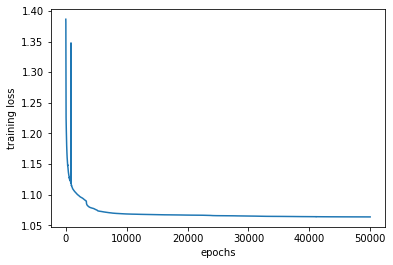

In [19]:
plt.plot(history)
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_pred = [fn.predict(sample).tolist().index(max(fn.predict(sample).tolist())) for sample in x_test]
y_true = [sample.item() for sample in y_test]

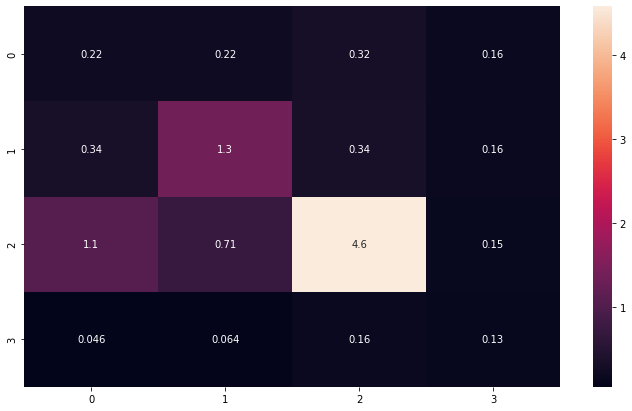

In [21]:
classes = ('0', '1', '2', '3')

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.show()

In [24]:
print(accuracy(y_pred, y_true))

0.6278643446379468
